In [1]:
import pandas as pd
givenData = pd.read_csv('givenDATA.csv',header = 0)
myData = pd.read_csv('Allinone.csv',header = 0)
myData1 = pd.read_table('Allinone1.csv',sep=',',header = 0)
geneAnno = pd.read_csv('geneid_anno_1.csv',header = 0)
peakAnno = pd.read_csv('BRCA_index.csv',header = 0)
geneName = pd.read_csv('id_name.csv',header = 0)
geneName.rename(columns = {'chr':'loadedanno.gene_id'},inplace=True)
geneAnno = pd.merge(geneAnno,geneName,how='left',on=['loadedanno.gene_id'])

Data Pre-processing and reformat
Integrating My Data
0. After checking the given data, filter the correlations. 
1. Exchanging gene's name and ID.

In [6]:
myData = pd.merge(myData,geneName,how = 'left',left_on=['geneid'],right_on=['loadedanno.gene_id'])
myData
myData1 =  pd.merge(myData1,geneName,how = 'left',left_on=['geneid'],right_on=['loadedanno.gene_id'])
myData1

,index,chr,geneid,peakname,pearson,mean,var,p_value,q_value,loadedanno.gene_id,loadedanno.gene_name
0,25025876,chr15,ENSG00000258484.3,BRCA_160393,0.806929,0.006144,0.009467,1.110223e-16,3.311745e-09,ENSG00000258484.3,SPESP1
1,17681298,chr10,ENSG00000182645.5,BRCA_124058,0.845993,-0.004592,0.011063,3.330669e-16,4.967617e-09,ENSG00000182645.5,CCDC172
2,17738879,chr10,ENSG00000223432.1,BRCA_124058,0.778808,-0.006029,0.009699,7.771561e-16,7.727405e-09,ENSG00000223432.1,RP11-62L18.3
3,15832336,chr5,ENSG00000247516.4,BRCA_57874,0.676519,0.011784,0.007085,1.443290e-15,1.076317e-08,ENSG00000247516.4,MIR4458HG
4,17738882,chr10,ENSG00000223432.1,BRCA_124067,0.757826,-0.006029,0.009699,4.329870e-15,2.583161e-08,ENSG00000223432.1,RP11-62L18.3
...,...,...,...,...,...,...,...,...,...,...,...
41926,4571275,chr8,ENSG00000265266.1,BRCA_105525,0.443252,-0.003207,0.011363,1.405512e-05,9.999708e-03,ENSG00000265266.1,AC022681.1
41927,3499495,chr8,ENSG00000272159.1,BRCA_95561,0.533779,0.023737,0.014830,1.405514e-05,9.999485e-03,ENSG00000272159.1,RP11-350N15.6
41928,15812145,chr5,ENSG00000170561.11,BRCA_57611,0.594656,-0.004637,0.020474,1.405524e-05,9.999316e-03,ENSG00000170561.11,IRX2
41929,9269101,chr17,ENSG00000263818.4,BRCA_175440,0.499386,0.001136,0.014152,1.405582e-05,9.999493e-03,ENSG00000263818.4,CTD-2206N4.4


In [3]:
relation_M1 = myData1[['loadedanno.gene_name','peakname','q_value']]
relation_M = myData[['loadedanno.gene_name','peakname','q_value']]
relation_G = givenData[['Linked_Gene','Peak_Name','Raw_FDR','Raw_Correlation']]

comparing = pd.merge(relation_G,relation_M,how='inner',left_on=['Linked_Gene'],right_on=['loadedanno.gene_name'])
comparing

,Linked_Gene,Peak_Name,Raw_FDR,loadedanno.gene_name,peakname,q_value
0,ISG15,BRCA_55,0.000410,ISG15,BRCA_55,0.000852
1,ISG15,BRCA_55,0.000410,ISG15,BRCA_56,0.001521
2,ISG15,BRCA_55,0.000410,ISG15,BRCA_54,0.005936
3,ISG15,BRCA_55,0.000410,ISG15,BRCA_52,0.009076
4,ISG15,BRCA_56,0.000598,ISG15,BRCA_55,0.000852
...,...,...,...,...,...,...
78339,FGF13,BRCA_215488,0.003202,FGF13,BRCA_215487,0.004447
78340,FGF13,BRCA_215489,0.000725,FGF13,BRCA_215489,0.000560
78341,FGF13,BRCA_215489,0.000725,FGF13,BRCA_215488,0.001953
78342,FGF13,BRCA_215489,0.000725,FGF13,BRCA_215484,0.003556


In [13]:
comparing1 = comparing[comparing['Peak_Name']==comparing['peakname']]
del comparing1['loadedanno.gene_name']
del comparing1['peakname']
comparing1 = pd.merge(comparing1,peakAnno,how='left',left_on='Peak_Name',right_on='name')
del comparing1['Peak_Name']
del comparing1['end']
comparing1 = pd.merge(comparing1,geneAnno,how='left',left_on='Linked_Gene',right_on='loadedanno.gene_name')
del comparing1['loadedanno.gene_name']

del comparing1['loadedanno.type']
del comparing1['width']
del comparing1['exonlen']
del comparing1['chr']
del comparing1['q_value']
distence = comparing1['start_x']-comparing1['start_y']
comparing1['dist'] = distence
comparing1.to_csv('final_result1.csv',index=0)

In [17]:
see = comparing1['Linked_Gene'].value_counts()
see

one =  see.index 
geneidfre = pd.DataFrame({'geneid':one,'times':see})

,geneid,times
HOXB-AS3,HOXB-AS3,55
HOXB6,HOXB6,32
PLAC4,PLAC4,28
RP1-309I22.2,RP1-309I22.2,21
DDHD2,DDHD2,19
...,...,...
LONRF1,LONRF1,1
FAM95C,FAM95C,1
ZNF667-AS1,ZNF667-AS1,1
TRIM54,TRIM54,1


In [18]:
geneidfre.to_csv('gene_times.txt',sep='\t',index=0)

In [8]:
comparing2 = pd.merge(relation_G,relation_M1,how='inner',left_on=['Linked_Gene'],right_on=['loadedanno.gene_name'])
comparing2 = comparing2[comparing2['Peak_Name']==comparing2['peakname']]
comparing2

,Linked_Gene,Peak_Name,Raw_FDR,loadedanno.gene_name,peakname,q_value
0,ISG15,BRCA_55,0.000410,ISG15,BRCA_55,0.000265
5,ISG15,BRCA_56,0.000598,ISG15,BRCA_56,0.000542
10,ISG15,BRCA_54,0.001011,ISG15,BRCA_54,0.003148
12,ARHGEF10L,BRCA_2138,0.001070,ARHGEF10L,BRCA_2138,0.007413
16,LIN28A,BRCA_3222,0.000829,LIN28A,BRCA_3222,0.000241
...,...,...,...,...,...,...
105156,BEX2,BRCA_214533,0.000954,BEX2,BRCA_214533,0.001603
105157,KLHL13,BRCA_214886,0.000540,KLHL13,BRCA_214886,0.005708
105159,GPC4,BRCA_215304,0.000676,GPC4,BRCA_215304,0.000724
105161,FGF13,BRCA_215488,0.003202,FGF13,BRCA_215488,0.003531


In [13]:
comparing3 = pd.merge(relation_M,relation_M1,how='inner',on=['loadedanno.gene_name'])
comparing3 = comparing3[comparing3['peakname_x']==comparing3['peakname_y']]
comparing3

,loadedanno.gene_name,peakname_x,q_value_x,peakname_y,q_value_y
0,CCDC172,BRCA_124058,3.311745e-09,BRCA_124058,4.967617e-09
88,CCDC172,BRCA_124065,8.068615e-08,BRCA_124065,1.129889e-07
176,CCDC172,BRCA_124191,1.210443e-07,BRCA_124191,1.766645e-07
264,CCDC172,BRCA_124181,1.351507e-07,BRCA_124181,1.871136e-07
352,CCDC172,BRCA_124189,1.239357e-07,BRCA_124189,1.882175e-07
...,...,...,...,...,...
13483650,CSF2RA,BRCA_212007,9.900621e-03,BRCA_212007,9.843057e-03
13483651,LINC00704,BRCA_116032,9.910766e-03,BRCA_116032,9.205839e-03
13483652,EIF2S1,BRCA_153774,9.970024e-03,BRCA_153774,9.031331e-03
13483653,LRRIQ1,BRCA_143103,9.970085e-03,BRCA_143103,9.494960e-03


In [14]:
relation_M

,loadedanno.gene_name,peakname,q_value
0,CCDC172,BRCA_124058,3.311745e-09
1,SPESP1,BRCA_160393,1.655872e-09
2,RP11-62L18.3,BRCA_124058,4.415660e-09
3,MIR4458HG,BRCA_57874,9.935235e-09
4,RP11-62L18.3,BRCA_124067,1.589638e-08
...,...,...,...
43834,MIEN1,BRCA_175787,9.998851e-03
43835,CTB-58E17.9,BRCA_175049,9.999176e-03
43836,DDHD2,BRCA_95678,9.999149e-03
43837,AIM1,BRCA_75196,9.999842e-03


In [17]:
import  numpy as np
meanGiven = np.mean(givenData['Raw_FDR'])
print(str(meanGiven))
meanRemain = np.mean(comparing1['Raw_FDR'])
print(str(meanRemain))

0.0015615428375202905
0.0012043919938093323


In [30]:
import matplotlib.pyplot as plt
distence.value_counts()

-278       5
-273       4
-282       3
-249       3
-307       3
          ..
 89337     1
-309844    1
 14932     1
 10838     1
 533       1
Length: 2347, dtype: int64

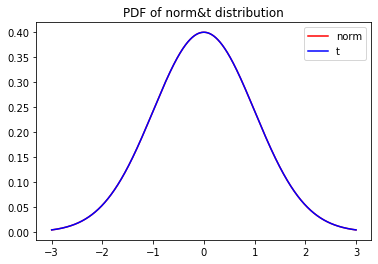

In [40]:
from scipy import stats
import numpy as np
x = np.linspace(-3,3,100000)
y = stats.norm.pdf(x,0,1)
z = stats.t.pdf(x,9999)
plt.plot(x,y,c="red")
plt.plot(x,z,c="blue")
plt.legend(['norm','t'])
plt.title('PDF of norm&t distribution')


plt.savefig('normT.jpg')
plt.show()

In [3]:
teatPearson = pd.read_csv('test_pearson_onBRCA_11.csv',header=0)

In [4]:
relation_G = givenData[['Linked_Gene','Peak_Name','Raw_FDR','Raw_Correlation']]
myData2 =  pd.merge(teatPearson,geneName,how = 'left',left_on=['geneid'],right_on=['loadedanno.gene_id'])
comparing22 = pd.merge(relation_G,myData2,how='inner',left_on=['Linked_Gene'],right_on=['loadedanno.gene_name'])


In [5]:
comparing22 = comparing22[comparing22['Peak_Name']==comparing22['peakname']]
comparing22


,Linked_Gene,Peak_Name,Raw_FDR,Raw_Correlation,chr,geneid,peakname,pearson,p,loadedanno.gene_id,loadedanno.gene_name
20,SAMD11,BRCA_33,0.000610,0.714683,chr1,ENSG00000187634.9,BRCA_33,0.664366,1.264819e-12,ENSG00000187634.9,SAMD11
437,SAMD11,BRCA_21,0.002345,0.631410,chr1,ENSG00000187634.9,BRCA_21,0.557175,1.420609e-08,ENSG00000187634.9,SAMD11
866,SAMD11,BRCA_25,0.000616,0.713963,chr1,ENSG00000187634.9,BRCA_25,0.641291,1.285256e-11,ENSG00000187634.9,SAMD11
1295,SAMD11,BRCA_30,0.000913,0.688027,chr1,ENSG00000187634.9,BRCA_30,0.630853,3.444331e-11,ENSG00000187634.9,SAMD11
1722,SAMD11,BRCA_31,0.000546,0.722300,chr1,ENSG00000187634.9,BRCA_31,0.660313,1.928728e-12,ENSG00000187634.9,SAMD11
...,...,...,...,...,...,...,...,...,...,...,...
17484870,FGF13,BRCA_215488,0.003202,0.612873,chrX,ENSG00000129682.12,BRCA_215488,0.476440,2.363554e-06,ENSG00000129682.12,FGF13
17485045,FGF13,BRCA_215489,0.000725,0.702742,chrX,ENSG00000129682.12,BRCA_215489,0.516576,2.193511e-07,ENSG00000129682.12,FGF13
17485628,TREX2,BRCA_215724,0.002682,0.623386,chrX,ENSG00000183479.11,BRCA_215724,0.481551,1.775256e-06,ENSG00000183479.11,TREX2
17485876,RENBP,BRCA_215800,0.002862,0.619495,chrX,ENSG00000102032.11,BRCA_215800,0.417534,4.683220e-05,ENSG00000102032.11,RENBP


In [17]:
teatPearson.sort_values(by='p',ascending=True,inplace=True)
teatPearson.reset_index(inplace=True)
